In [1]:
import torch
import torchvision

/home/thangld2/python_source/test/env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
!pip list | grep torch

pytorch-lightning       1.7.7      
torch                   1.12.1     
torchmetrics            0.10.0     
torchvision             0.13.1     


In [2]:
!pip list | grep transformers

transformers            4.27.4     


In [2]:
dataset = torchvision.datasets.Food101("./db")

In [3]:
image, meta = dataset[1]

23


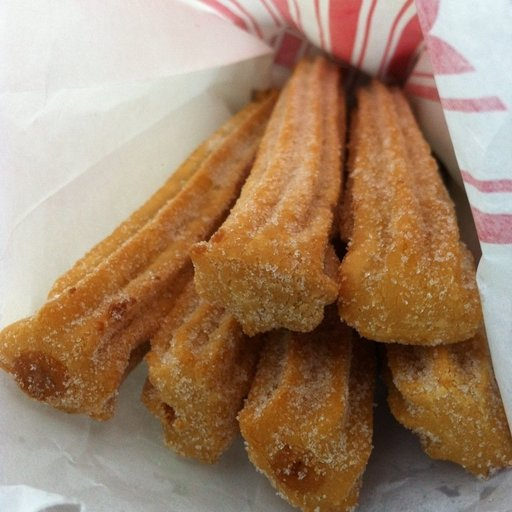

In [4]:
print(meta)
image

In [22]:
image.size

(512, 512)

In [5]:
from transformers import DetrForObjectDetection, AutoImageProcessor

model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")
image_processor = AutoImageProcessor.from_pretrained("facebook/detr-resnet-50")

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet50_a1_0-14fe96d1.pth" to /home/thangld2/.cache/torch/hub/checkpoints/resnet50_a1_0-14fe96d1.pth
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/home/thangld2/python_source/test/env/lib/python3.8/site-packages/transformers/models/detr/image_processing_detr.py:780: FutureWarning: The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
  warnings.warn(


In [11]:
model.summary()

AttributeError: 'DetrForObjectDetection' object has no attribute 'summary'

In [12]:
# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

# forward pass
outputs = model(output_attentions =True,**inputs)

# the last hidden states are the final query embeddings of the Transformer decoder
# these are of shape (batch_size, num_queries, hidden_size)
last_hidden_states = outputs.last_hidden_state
list(last_hidden_states.shape)

[1, 100, 256]

In [31]:
target_sizes

tensor([[512, 512]])

In [9]:
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[
    0
]

In [10]:
results

{'scores': tensor([0.9908], grad_fn=<IndexBackward0>),
 'labels': tensor([60]),
 'boxes': tensor([[236.6448, 311.4842, 379.8898, 510.9037]], grad_fn=<IndexBackward0>)}